<small><i>This notebook was put together by [Jake Vanderplas](http://www.vanderplas.com) for PyCon 2014. Source and license info is on [GitHub](https://github.com/jakevdp/sklearn_pycon2014/).</i></small>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## K Means

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

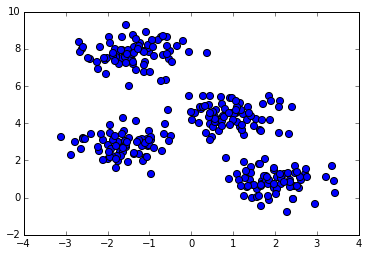

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, scikit-learn's implementation can solve KMeans relatively quickly.

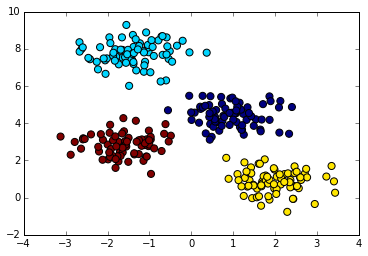

In [5]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50);

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

## Exercise: KMeans for Color Compression

One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

Scikit-learn has a number of images that you can play with, accessed through the datasets module. For example:

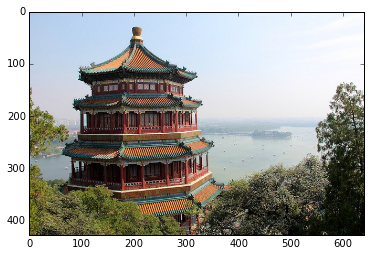

In [4]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china);

The image itself is stored in a 3-dimensional array, of size ``(height, width, RGB)``:

In [6]:
china.shape

(427, 640, 3)

We can envision this image as a cloud of points in a 3-dimensional color space. We'll rescale the colors so they lie between 0 and 1, then reshape the array to be a typical scikit-learn input:

In [7]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


We now have 273,280 points in 3 dimensions.  Your task is to use KMeans to compress the $256^3$ colors into a smaller number (say, 64 colors). Basically, you want to find $N_{color}$ clusters in the data, and create a new image where the true input color is replaced by the color of the closest cluster.

Your goal is to fill-in the following function:

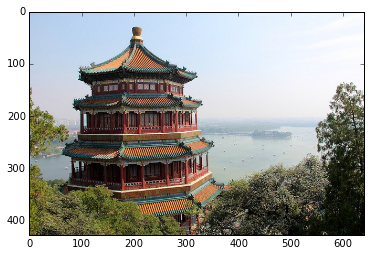

In [8]:
def compress_image(image, n_colors):
    """Compress an image

    Parameters
    ==========
    image : numpy array
        array of shape (height, width, 3) with values between 0 and 1
    n_colors : integer
        the number of colors in the final compressed image
        (i.e. the number of KMeans clusters to fit).
        
    Returns
    =======
    new_image : numpy array
        array representing the new image, compressed via KMeans clustering.
        It has the same shape as the input image, but contains only
        ``n_colors`` distinct colors.
    """
    X = (image / 255.0).reshape(-1, 3)
    new_image = image.copy()
    
    #------------
    # Your KMeans code goes here!
    #------------
    
    # if you convert back to integer, make sure it's the correct type!
    # i.e. new_image = (255 * new_image).astype(np.uint8)
    return new_image

# create and plot the new image
new_image = compress_image(china, 64)
plt.imshow(new_image);

How does the color fidelity compare to the original?

Hint: because the calculation takes a long time, you may wish to test it on only a subset of the image. For example,
```
new_image = compress_image(china[::5, ::5], 64)
```

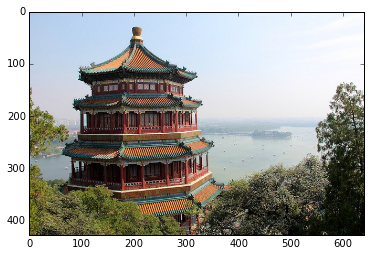

In [11]:
test_image = compress_image(china, 64)
plt.imshow(test_image);

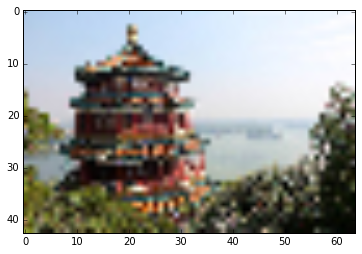

In [10]:
plt.imshow(china[::10,::10])

Give this a good try! One solution is below in case you really get stuck.

In [12]:
def compress_image(image, n_colors=64):
    """Compress an image

    Parameters
    ==========
    image : numpy array
        array of shape (height, width, 3) with integer values between 0 and 255
    n_colors : integer
        the number of colors in the final compressed image
        (i.e. the number of KMeans clusters to fit).
        
    Returns
    =======
    new_image : numpy array
        array representing the new image, compressed via KMeans clustering.
        It has the same shape and dtype as the input image, but contains
        only ``n_colors`` distinct colors.
    """
    X = image.reshape(-1, 3) / 255.
    model = KMeans(n_colors)
    labels = model.fit_predict(X)
    colors = model.cluster_centers_
    new_image = colors[labels].reshape(image.shape)
    return (255 * new_image).astype(np.uint8)

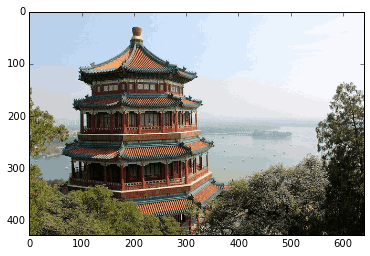

In [13]:
new_image = compress_image(china, 64)
plt.imshow(new_image);